# Lecture 2 - text data classification 

In today's lecture

- basic text manipulation
- RegEx
- text preprocessing for classification 
- classification and tuning with supervised models on "Movie reviews"

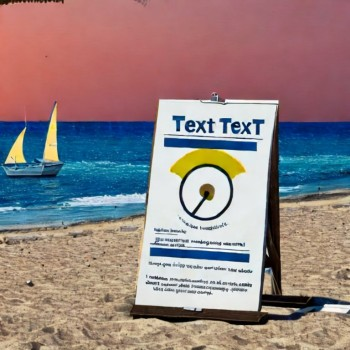

Language is the tool we use to communicate, think, store knowledge. Its the key! 

Text data is a very hard data type to work with : 

- High Dimensionality: Text data, especially when tokenized into individual words or n-grams, can lead to a very high-dimensional feature space. This can make models computationally expensive and increase the risk of overfitting.

- Sparsity: Most text documents will only contain a tiny fraction of the words in a language, resulting in many zeros in the feature representation. This sparsity can make certain modeling techniques inefficient or infeasible.

- Ambiguity and Polysemy: Many words in languages have multiple meanings based on context. For example, the word "bank" can mean the side of a river or a financial institution.

- Synonymy: Different words can have similar meanings, like "big" and "large". This poses a challenge in identifying the true intent or sentiment behind texts.

- Complex Dependencies: The meaning of a word can depend on its surrounding words, or even words much earlier in a text. Capturing long-term dependencies can be challenging.

- Variability: Texts can express the same idea in myriad ways due to differences in style, tone, or choice of vocabulary.

- Noisy Data: Text data, especially from sources like social media, can be noisy. They may contain typos, slang, non-standard grammar, or emoticons.

- Handling of Out-of-Vocabulary (OOV) Words: In real-world applications, it's common to encounter words not seen during training. Handling OOV words is challenging.

- Cultural and Temporal Dynamics: The way language is used can change based on cultural or temporal contexts, making it hard to generalize models across different cultures or time periods.

- Data Labeling Challenges: For supervised learning, text data may require manual labeling. This can be time-consuming, expensive, and subjective. Inter-annotator disagreement can also be an issue.

- Bias and Fairness: Text data, especially from the web, can contain biases. Machine learning models trained on such data can inherit and amplify these biases, leading to unfair or prejudiced predictions.

- Scalability: Processing and analyzing large text corpora require significant computational resources and efficient algorithms.

- Multilingual Challenges: Building models that work across multiple languages or even dialects can be challenging, especially when resources for certain languages are scarce.

We want to work with numeric data, as always. Images are easier, you have number associated to pixel values. There are multiple ways, RGB, HSV... but still it is quite intuitive. 

With text is harder, any Idea on how to encode text into numbers? 

### Preprocessing

In [1]:
text = "."

# Lowercasing
lowercased_text = text.lower()
print("Lowercased Text:", lowercased_text)

# Tokenization
tokens = lowercased_text.split()
print("Tokens:", tokens)

Lowercased Text: .
Tokens: ['.']


In [2]:
#remove punctuations
import string

text = "Hello, World! who's speaking? Ah, it's you!"
clean_text = text.translate(str.maketrans('', '', string.punctuation))
print("Cleaned Text:", clean_text)

Cleaned Text: Hello World whos speaking Ah its you


nltk stands for the Natural Language Toolkit. It's a leading platform for building Python programs to work with human language data (text)

In [3]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/faster/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
from nltk.corpus import stopwords
text = "This is an example of removing stopwords from a sentence."
tokens = text.split()
filtered_tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
print("Filtered Tokens:", filtered_tokens)

Filtered Tokens: ['example', 'removing', 'stopwords', 'sentence.']


In [5]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
text = "running runner runs run"
tokens = text.split()
stemmed_tokens = [ps.stem(token) for token in tokens]
print("Stemmed Tokens:", stemmed_tokens)

Stemmed Tokens: ['run', 'runner', 'run', 'run']


In [6]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
text = "geese mice swimming swam"
tokens = text.split()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
print("Lemmatized Tokens:", lemmatized_tokens)

[nltk_data] Downloading package wordnet to /home/faster/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lemmatized Tokens: ['goose', 'mouse', 'swimming', 'swam']


### Regular expressions? Regex?

Regex are used primarily for string matching and manipulation, they offer a concise and flexible means to identify strings of text, such as specific words or patterns.

Regex example:  ^\d{5}$

    .: Matches any character except a newline.
    ^: Matches the start of the string.
    $: Matches the end of the string.
    *: Matches 0 or more repetitions of the preceding character or group.
    +: Matches 1 or more repetitions of the preceding character or group.
    ?: Matches 0 or 1 repetition of the preceding character or group.

    \d: Matches any digit (0-9).
    \D: Matches any non-digit character.
    \w: Matches any word character (alphanumeric characters plus underscore).
    \W: Matches any non-word character.
    \s: Matches any whitespace character (spaces, tabs, line breaks).
    \S: Matches any non-whitespace character.

    {n}: Matches exactly n occurrences.
    {n,}: Matches n or more occurrences.
    {n,m}: Matches between n and m occurrences.

In [8]:
import re

text = "Hello, World!"
match = re.search("World", text)
if match:
    print("Found:", match.group())

Found: World


In [9]:
text = "The rain in Spain."
match = re.search("[RS]pain", text)
if match:
    print("Found:", match.group())

Found: Spain


In [10]:
text = "Order number: 12345"
match = re.search("\d+", text)  # + indicates one or more
if match:
    print("Found:", match.group())

Found: 12345


In [11]:
text = "Hello"
if re.match("^Hello", text):  # ^ matches the start
    print("Starts with 'Hello'")
if re.search("Hello$", text):  # $ matches the end
    print("Ends with 'Hello'")


Starts with 'Hello'
Ends with 'Hello'


In [12]:
text = "Contact us at contact@example.com"
match = re.search("[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,4}", text)
if match:
    print("Found email:", match.group())

Found email: contact@example.com


In [13]:
text = "blue, red, green"
replaced_text = re.sub("blue", "yellow", text)
print(replaced_text)  # "yellow, red, green"


yellow, red, green


In [14]:
text = "apple,banana,orange"
fruits = re.split(",", text)
print(fruits)  # ['apple', 'banana', 'orange']


['apple', 'banana', 'orange']


In [15]:
text = "HELLO"
match = re.search("hello", text, re.IGNORECASE)
if match:
    print("Found:", match.group())

Found: HELLO


### Encoding text
transforming text into numbers

Label encoding, the simplest, we used last lecture to encode the class names. This is more or less its only use. 

In [16]:
from sklearn.preprocessing import LabelEncoder

labels = ["cat", "dog", "bird", "cat", "bird"]
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
print(encoded_labels) 

[1 2 0 1 0]


Bag of Words Encoding is essentially a histogram of word frequencies in a text document.

How it works: For each document or text sample, count the number of occurrences of each word and represent the document as this count vector.

When to use it:

    Document classification: BoW is popular for tasks like email spam classification or sentiment analysis, where the occurrence of certain words can be a strong indicator of the class.
    Texts with different lengths: Since BoW leads to fixed-length vectors (the size of the vocabulary), it's useful when dealing with texts of varying lengths.
    Simple models: For models like Naive Bayes, BoW can be very effective.

Cons:

    Loses all information about word order. "This is good, not bad" and "This is bad, not good" would have the same representation.
    Like one-hot encoding, BoW can also lead to high-dimensional data with large vocabularies.
    Doesn't capture semantic relationships between words.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "Hello there this is the machine learning course.",
    "Welcome to the machine learning class."
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

print("Vocabulary:", vectorizer.get_feature_names_out())
print("BoW Representation:\n", X.toarray())

Vocabulary: ['class' 'course' 'hello' 'is' 'learning' 'machine' 'the' 'there' 'this'
 'to' 'welcome']
BoW Representation:
 [[0 1 1 1 1 1 1 1 1 0 0]
 [1 0 0 0 1 1 1 0 0 1 1]]


TF-IDF is a statistical measure that evaluates the importance of a word in a document, relative to a collection of documents (often called a corpus). It's composed of two terms:

Term Frequency (TF): Represents how often a term appears in a given document.

$$TF(t,d)= \frac{Number \, of \, times \, term \,t \,appears \,in \,document \,d}{Total\, number \,of \,terms \,in\, document\, d}$$


Inverse Document Frequency (IDF): Represents the significance of the term across all documents in the corpus. It assigns more weight to terms that are rare across documents.

$$IDF(t)= log⁡(\frac{Total\, number\, of\, documents}{Number\, of \,documents \,containing\, term\, t})$$

The TF-IDF value for a term in a document is then:
$$TF-IDF(t,d)=TF(t,d)×IDF(t)$$

Words with high TF-IDF scores are those that are important in a given document relative to the entire corpus.

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs = [
    "I love machine learning.",
    "Machine learning is challenging.",
    "Python is a popular language for machine learning.",
]

# Initialize a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Compute TF-IDF values
tfidf_matrix = vectorizer.fit_transform(docs)

# Feature names (words in the vocabulary)
features = vectorizer.get_feature_names_out()


In [48]:
features

array(['challenging', 'for', 'is', 'language', 'learning', 'love',
       'machine', 'popular', 'python'], dtype=object)

In [49]:
tfidf_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.45329466,
        0.76749457, 0.45329466, 0.        , 0.        ],
       [0.66283998, 0.        , 0.50410689, 0.        , 0.39148397,
        0.        , 0.39148397, 0.        , 0.        ],
       [0.        , 0.43535684, 0.3311001 , 0.43535684, 0.25712876,
        0.        , 0.25712876, 0.43535684, 0.43535684]])

For each word in a document, One-Hot Encoding represents it as a vector where only one position is '1' (the position corresponding to that word's index in the vocabulary), and all other positions are '0'.

How it works: In one-hot encoding, for each unique word in the data, you create a new binary feature. A word occurrence is marked by a 1 in its corresponding feature and 0 in all others.

When to use it:

    Categorical data with low cardinality: If you have categorical data that isn't text (e.g., colors: red, green, blue), one-hot encoding is often a good choice because the data doesn't have high cardinality.
    Sequential models: For models where the sequence of data matters (like in RNNs), one-hot encoding can preserve word order.

Cons:

    Can lead to very high-dimensional data when dealing with large vocabularies in text data, which can be memory-intensive.
    Doesn't capture semantic meaning of words or the relationship between words.

In [18]:
from sklearn.preprocessing import OneHotEncoder

words = [["hello"], ["this"], ["is"], ["the"], ["machine"], ["learning"], ["course"]]

encoder = OneHotEncoder(sparse_output=False)
encoded_words = encoder.fit_transform(words)

print("One-Hot Encoded Words:\n", encoded_words)

One-Hot Encoded Words:
 [[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


    Nature of the Problem: For document classification problems, BoW might be more appropriate. For tasks that need to understand the context or sequence, like machine translation, other encodings like embeddings might be more appropriate.
    Size of Vocabulary: If your dataset has a vast vocabulary, BoW can lead to very large vectors. One-hot encoding would also result in large vectors but might be more manageable if you're looking at words in context (like in sequences) rather than entire documents.
    Model Complexity: Simpler models might benefit from the simplicity of BoW. More complex models, especially deep learning models, often benefit from other techniques like embeddings.
    Semantic Meaning: If capturing the semantic meaning of words is important, consider moving beyond one-hot and BoW to techniques like word embeddings (e.g., Word2Vec, GloVe).

In [80]:
from gensim.models import Word2Vec

sentences = [
    ["machine", "learning", "is", "amazing"],
    ["natural", "language", "processing", "is", "fun"],
    ["python", "is", "a", "popular", "language"]
]

model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
vector = model.wv['natural']  # Get vector for 'machine'
print(vector)

The state of the art, pretrained Bert tokenizer. This is what I would use if I wanted to encode text! I cannot execute this here I have no torch :(, but you have it on colab!

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

text = "Hello, world!"
inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
with torch.no_grad():
    outputs = model(**inputs)
    
# 'outputs' now contains the representations for the text
print(outputs['last_hidden_state'])

## Classification
Now we work towards a classification of text data

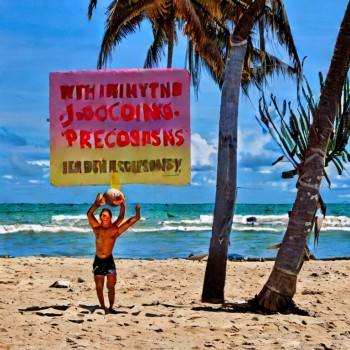

Our dataset of choice is the well known "IMDB Movie reviews" dataset having 2K movie reviews for natural language processing or text analytics. This is a dataset for binary sentiment classification, with each review having a "positive" or "negative" label

nltk has a tool to directly access the dataset

In [5]:
#download the dataset
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/fmerizzi/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

nltk has a proprietary class for text documents, for continuity with the last lecture we convert it to a Pandas DF

In [6]:
type(movie_reviews)

nltk.corpus.util.LazyCorpusLoader

In [7]:
import pandas as pd
reviews = []
for fileid in movie_reviews.fileids():
    tag, filename = fileid.split('/')
    reviews.append((filename, tag, movie_reviews.raw(fileid)))

df = pd.DataFrame(reviews, columns=['filename', 'tag', 'text'])

In [8]:
df.describe()

,filename,tag,text
count,2000,2000,2000
unique,2000,2,2000
top,cv000_29416.txt,neg,"plot : two teen couples go to a church party ,..."
freq,1,1000,1


In [9]:
df.head(10)

,filename,tag,text
0,cv000_29416.txt,neg,"plot : two teen couples go to a church party ,..."
1,cv001_19502.txt,neg,the happy bastard's quick movie review \ndamn ...
2,cv002_17424.txt,neg,it is movies like these that make a jaded movi...
3,cv003_12683.txt,neg,""" quest for camelot "" is warner bros . ' firs..."
4,cv004_12641.txt,neg,synopsis : a mentally unstable man undergoing ...
5,cv005_29357.txt,neg,capsule : in 2176 on the planet mars police ta...
6,cv006_17022.txt,neg,"so ask yourself what "" 8mm "" ( "" eight millime..."
7,cv007_4992.txt,neg,that's exactly how long the movie felt to me ....
8,cv008_29326.txt,neg,call it a road trip for the walking wounded . ...
9,cv009_29417.txt,neg,plot : a young french boy sees his parents kil...


We are interested in the tag (__label__) and the text corpus (__data__)lets isolate them into two lists. 

In [10]:
data = df["text"].tolist()

In [15]:
labels = df["tag"].tolist()

### Data

We start by looking at a single instance

In [35]:
data[500]

'you always have to be careful with the first official studio release out of the gate each year . \nthey\'re obviously films for which the studios have no great hopes ( having missed both the deadline for academy award eligibility and the big box-office holiday season ) . \ncombine that with howie long\'s first starring action role , and you\'ve got a doozy of a movie that , while not as bad as it could have been , isn\'t a very good film . \nhowie stars as an ace smokejumper ( a firefighter who parachutes into forest fires unreachable from the ground ) . \nin the slightly contrived opening scenes , we witness his heroism in action , as he , and his mentor ( played by scott glenn ) attempt to rescue a small girl and her dog from an oncoming forest fire . \nwilliam forsythe plays the bad guy , a mass murderer who has several million dollars tucked away to help fund his jailbreak . \nhe ( and five convict cohorts ) manages to get selected for firefighting duty when a woodland blaze just 

We can process the next line characters to have a clearer picture

In [36]:
print("\n".join(data[500].split("\n")))

you always have to be careful with the first official studio release out of the gate each year . 
they're obviously films for which the studios have no great hopes ( having missed both the deadline for academy award eligibility and the big box-office holiday season ) . 
combine that with howie long's first starring action role , and you've got a doozy of a movie that , while not as bad as it could have been , isn't a very good film . 
howie stars as an ace smokejumper ( a firefighter who parachutes into forest fires unreachable from the ground ) . 
in the slightly contrived opening scenes , we witness his heroism in action , as he , and his mentor ( played by scott glenn ) attempt to rescue a small girl and her dog from an oncoming forest fire . 
william forsythe plays the bad guy , a mass murderer who has several million dollars tucked away to help fund his jailbreak . 
he ( and five convict cohorts ) manages to get selected for firefighting duty when a woodland blaze just happens to 

What text encoding should we use?

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data)
data_counts.shape

(2000, 39659)

Let's add TF-IDF

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(data_counts)
data_counts_TFIDF = tf_transformer.transform(data_counts)
data_counts_TFIDF.shape

(2000, 39659)

In [53]:
data_counts_TFIDF[1]

<1x39659 sparse matrix of type '<class 'numpy.float64'>'
	with 148 stored elements in Compressed Sparse Row format>

### Labels

Now we focus on analysing the __label__, we need to encode this text into a numerical form, any ideas?

In [16]:
labels[:10]

['neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg']

What kind of text encoding technique we should use for this task? 

A class label encoder, of course

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
print(encoded_labels) 

[0 0 0 ... 1 1 1]


How is the data sorted? 

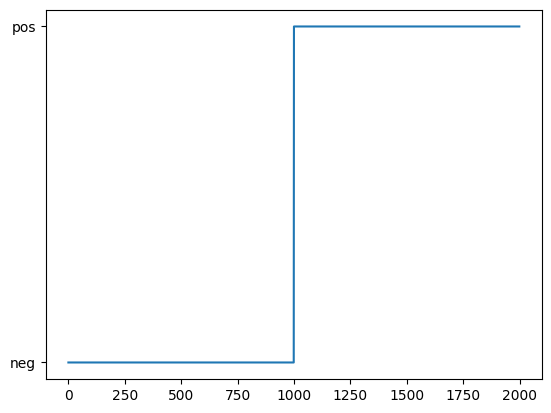

In [22]:
#Not randomly at all! 
import matplotlib.pyplot as plt
plt.plot(labels)

Rookie mistake: use this data for training without shuffling, maybe utilising the last 200 reviews as the test set. 

Like in the last lecture, we split the test and train set using the train_test_split function from sklearn, which also enable us to shuffle the dataset. 

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_counts_TFIDF, encoded_labels, test_size=0.2, random_state=42)

Let's take a look if the random shuffling was effective

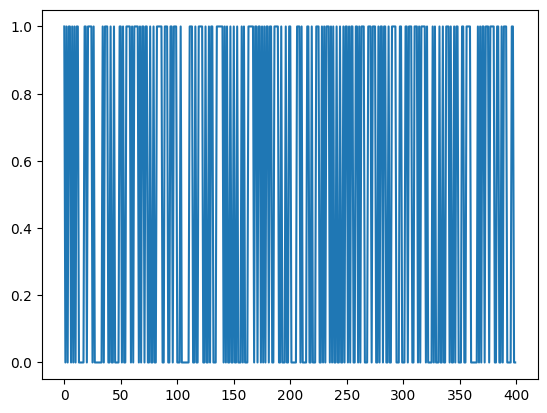

In [56]:
plt.plot(y_test)

why is shuffling necessary? 

 In many datasets, the data may be sorted or ordered in a specific way, such as by date or by class label. If the data is not shuffled, the model may end up being trained mostly on one class during an epoch and another class in another epoch. This can lead the model to struggle with generalization.

### Classification

We can now instantiate a classifier and see what performance we can get

In [57]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(x_train, y_train)

Do you remember how Naive Bayes works?

In [76]:
predicted = clf.predict(x_test)

Analyze the predicted labels

In [77]:
predicted

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [78]:
np.mean(predicted == y_test)

0.69

In [79]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.62      0.97      0.76       199
           1       0.93      0.41      0.57       201

    accuracy                           0.69       400
   macro avg       0.78      0.69      0.66       400
weighted avg       0.78      0.69      0.66       400



We can try to classify new reviews

In [72]:
docs_new = ['This film is horrible, bad, wrong, garbage, boring', 'The film is good, sweet, nice, interesting', "this film was a waste of time, terrible", "very nice experience, good!", "I don't know I liked some parts but other were bad"]
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tf_transformer.transform(X_new_counts)

def cat(c):
    if(c == 0):
        return "negative"
    else:
        return "positive"

predicted = clf.predict(X_new_tfidf)

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, cat(category)))

'This film is horrible, bad, wrong, garbage, boring' => negative
'The film is good, sweet, nice, interesting' => positive
'this film was a waste of time, terrible' => negative
'very nice experience, good!' => positive
"I don't know I liked some parts but other were bad" => negative


## Improving our results

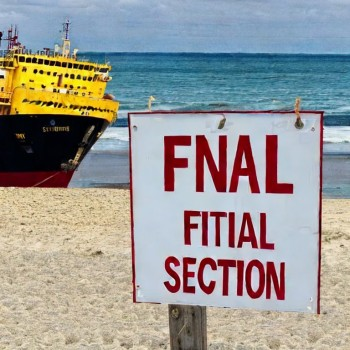

we can start by preprocessing our text reviews

In [85]:
data_lowercase = [text.lower() for text in data]
print("After Lowercasing:\n", data_lowercase[50][:300], "\n")

After Lowercasing:
 my giant is two movies for the price of one , but neither is worth the cost of admission , even if you get in free . 
as lamely directed by michael lehmann , the picture tries to be a comedy by using and reusing every giant joke in the book . 
 ( " without goliath , david is just some punk throwing  



In [91]:
import string
translator = str.maketrans('', '', string.punctuation)
data_no_punctuation = [text.translate(translator) for text in data_lowercase]
print("After Removing Punctuation:\n", data_no_punctuation[50][:300], "\n")

After Removing Punctuation:
 my giant is two movies for the price of one  but neither is worth the cost of admission  even if you get in free  
as lamely directed by michael lehmann  the picture tries to be a comedy by using and reusing every giant joke in the book  
   without goliath  david is just some punk throwing rocks    



In [94]:
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()
data_stemmed = [" ".join([stemmer.stem(word) for word in word_tokenize(text)]) for text in data_no_punctuation]
print("After Stemming:\n", data_stemmed[50][:300])


[nltk_data] Downloading package punkt to /home/fmerizzi/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


After Stemming:
 my giant is two movi for the price of one but neither is worth the cost of admiss even if you get in free as lame direct by michael lehmann the pictur tri to be a comedi by use and reus everi giant joke in the book without goliath david is just some punk throw rock languidli pace throughout the movi


In [102]:
from sklearn.pipeline import Pipeline
encoding_pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])

data_tfidf_preprocessed = encoding_pipe.fit_transform(data_stemmed)

In [103]:
# a lot less!
data_tfidf_preprocessed.shape

(2000, 31977)

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_tfidf_preprocessed, encoded_labels, test_size=0.2, random_state=42)

In [106]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(x_train, y_train)
predicted = clf.predict(x_test)
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       199
           1       0.86      0.74      0.79       201

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



Much better!

### Other models

In [107]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train, y_train)
predicted = clf.predict(x_test)
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       199
           1       0.83      0.80      0.82       201

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



In [108]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier().fit(x_train, y_train)
predicted = clf.predict(x_test)
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       199
           1       0.81      0.87      0.84       201

    accuracy                           0.83       400
   macro avg       0.84      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



In [109]:
from sklearn import svm
clf = svm.SVC().fit(x_train, y_train)
predicted = clf.predict(x_test)
from sklearn import metrics
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       199
           1       0.83      0.82      0.83       201

    accuracy                           0.82       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.82      0.82       400



### Grid search CV

It's a tool provided by the scikit-learn library to perform an exhaustive search over a specified hyperparameter grid. Very useful to automatically optimize model parameters for a specific task. 

Naive Bayes

In [117]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],
}

# Instantiate GridSearchCV with MultinomialNB and the parameter grid
clf = GridSearchCV(MultinomialNB(), param_grid, cv=5)
clf.fit(x_train, y_train)

# Print results
print(f"Best parameters for MultinomialNB: {clf.best_params_}")
print(f"Best cross-validation score: {clf.best_score_:.4f}")
print(f"Test score: {clf.score(x_test, y_test):.4f}")

Best parameters for MultinomialNB: {'alpha': 1.0}
Best cross-validation score: 0.7869
Test score: 0.8075


Logistic Regression

In [120]:
from sklearn.model_selection import GridSearchCV
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports both l1 and l2
}

# Instantiate GridSearchCV with MultinomialNB and the parameter grid
clf = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5)
clf.fit(x_train, y_train)

# Print results
print(f"Best parameters for MultinomialNB: {clf.best_params_}")
print(f"Best cross-validation score: {clf.best_score_:.4f}")
print(f"Test score: {clf.score(x_test, y_test):.4f}")

Best parameters for MultinomialNB: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.8462
Test score: 0.8400


Stochastic gradient descent

In [122]:
from sklearn.model_selection import GridSearchCV
param_grid_sgd = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'log_loss'],  # hinge: linear SVM, log: logistic regression
}
# Instantiate GridSearchCV with MultinomialNB and the parameter grid
clf = GridSearchCV(SGDClassifier(), param_grid_sgd, cv=5)
clf.fit(x_train, y_train)

# Print results
print(f"Best parameters for MultinomialNB: {clf.best_params_}")
print(f"Best cross-validation score: {clf.best_score_:.4f}")
print(f"Test score: {clf.score(x_test, y_test):.4f}")

Best parameters for MultinomialNB: {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l2'}
Best cross-validation score: 0.8387
Test score: 0.8250


In [124]:
from sklearn.model_selection import GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
# Instantiate GridSearchCV with MultinomialNB and the parameter grid
clf = GridSearchCV(svm.SVC(), param_grid_svm, cv=5)
clf.fit(x_train, y_train)

# Print results
print(f"Best parameters for MultinomialNB: {clf.best_params_}")
print(f"Best cross-validation score: {clf.best_score_:.4f}")
print(f"Test score: {clf.score(x_test, y_test):.4f}")

Best parameters for MultinomialNB: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.8450
Test score: 0.8250


In [50]:
gs_clf.cv_results_

{'mean_fit_time': array([0.15598822, 0.4634263 , 0.12453456, 0.36748967, 0.09304676,
        0.37393603, 0.09389501, 0.30454354]),
 'std_fit_time': array([0.00623815, 0.00999343, 0.02958139, 0.02368754, 0.00574263,
        0.01613152, 0.00407473, 0.0342618 ]),
 'mean_score_time': array([0.01733146, 0.03975954, 0.01569467, 0.03613462, 0.01676855,
        0.03441443, 0.01707463, 0.0206018 ]),
 'std_score_time': array([0.00128877, 0.00552005, 0.00270185, 0.00424706, 0.00248393,
        0.00529947, 0.0014485 , 0.00215173]),
 'param_clf__alpha': masked_array(data=[0.01, 0.01, 0.01, 0.01, 0.001, 0.001, 0.001, 0.001],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_tfidf__use_idf': masked_array(data=[True, True, False, False, True, True, False, False],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_vect__ngram_range'

### Appendix!

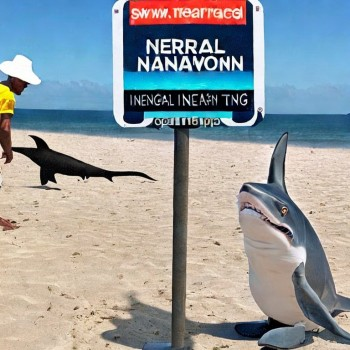

Once again we attempt the use of a neural network on the same task (as a black box) 

In [131]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

model = Sequential()
model.add(Dense(128, input_dim=31977, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # 2 classes in our example

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

# Train the model
model.fit(x_train, y_train_onehot, epochs=10, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test_onehot)
print(f"Neural Network - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")


Epoch 1/10


/home/fmerizzi/anaconda3/envs/tfgpu-210/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_4/dense_12/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_4/dense_12/embedding_lookup_sparse/Reshape:0", shape=(None, 128), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_4/dense_12/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


25/25 [==============================] - 0s 4ms/step - loss: 0.6825 - accuracy: 0.5919
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.5736 - accuracy: 0.8487
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 0.3154 - accuracy: 0.9369
Epoch 4/10
25/25 [==============================] - 0s 5ms/step - loss: 0.1174 - accuracy: 0.9819
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0430 - accuracy: 0.9969
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0178 - accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0099 - accuracy: 0.9994
Epoch 8/10
25/25 [==============================] - 0s 5ms/step - loss: 0.0080 - accuracy: 0.9994
Epoch 9/10
25/25 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 10/10
13/13 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.8275
Neural Network - Loss: 0.4670,

Not great... any idea what problem is here? (hint: It's in the preprocessing) 